In [1]:
%load_ext autoreload
%autoreload 2

import pickle, json
from enterprise_extensions.models import model_2a, model_1
from enterprise.signals.parameter import sample
import numpy as np
from impulse.pta.pta_utils import setup_sampler
from impulse.pta.hypermodel import HyperModel
import matplotlib.pyplot as plt
from emcee.autocorr import integrated_time
from la_forge import core, diagnostics

import ray

In [2]:
with open('/Users/aaron/Documents/GitHub/12p5yr_stochastic_analysis/tutorials/data/psrs.pkl', 'rb') as f:
    psrs = pickle.load(f)

with open('/Users/aaron/Documents/GitHub/12p5yr_stochastic_analysis/tutorials/data/channelized_12p5yr_v3_full_noisedict.json', 'r') as f:
    params = json.load(f)

In [3]:
pta1 = model_1([psrs[0]], noisedict=params, tm_marg=True, tnequad=True, tm_svd=True)
pta2a = model_2a([psrs[0]], noisedict=params, gamma_common=4.33, n_gwbfreqs=5, tm_marg=True, tnequad=True, tm_svd=True)

In [4]:
mod_index = np.arange(2)
pta = dict.fromkeys(mod_index)
pta[0] = pta1
pta[1] = pta2a

In [5]:
super_model = HyperModel(pta)

ndim = len(super_model.param_names)
groups = super_model.get_parameter_groups()

/Users/aaron/mambaforge/envs/rosettaprise/lib/python3.9/site-packages/numpy/lib/arraysetops.py:270: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


In [6]:
super_model.param_names

['B1855+09_red_noise_gamma',
 'B1855+09_red_noise_log10_A',
 'gw_log10_A',
 'nmodel']

In [7]:
super_model.log_weights

In [8]:
x0 = super_model.initial_sample()

In [9]:
sampler = setup_sampler(super_model, outdir='hm_test_w_ray', hypermodel=True, ntemps=4, ncores=4, num_samples=1e6, ret_chain=True, adapt=False)

2022-07-31 23:04:44,958	WARNING worker.py:525 -- `ray.get_gpu_ids()` will always return the empty list when called from the driver. This is because Ray does not manage GPU allocations to the driver process.
:actor_name:RayMHSampler


:actor_name:RayMHSampler
:actor_name:RayMHSampler


:actor_name:RayMHSampler


:actor_name:RayMHSampler


:actor_name:RayMHSampler


:actor_name:RayMHSampler


:actor_name:RayMHSampler
2022-07-31 23:04:47.040 | INFO     | impulse.pta.pta_utils:setup_sampler:200 - Adding nmodel uniform distribution draws...

2022-07-31 23:04:47.041 | INFO     | impulse.pta.pta_utils:setup_sampler:210 - Adding red noise prior draws...

2022-07-31 23:04:47.041 | INFO     | impulse.pta.pta_utils:setup_sampler:245 - Adding GWB uniform distribution draws...



In [10]:
chain = sampler.sample()

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/aaron/Documents/GitHub/enterprise/enterprise/signals/parameter.py:62: RuntimeWarning: divide by zero encountered in log
  logpdf = np.log(self.prior(value, **kwargs))
2022-07-31 23:04:50.954 | DEBUG    | impulse.base:_ptstep:220 - [(array([[  6.38983256, -19.06569803, -15.50459181,   0.1       ],
       [  6.38983256, -19.06569803, -15.02010414,   0.1       ],
       [  6.38983256, -17.52365722, -15.02010414,   0.1       ],
       [  6.38983256, -17.52365722, -15.02010414,   0.1       ],
       [  5.603473  , -16.73439924, -15.65271599,   0.1       ],
       [  5.603473  , -16.73439924, -15.46803258,   0.1       ],
       [  4.53201913, -16.89821099, -15.46803258,   0.1       ],
       [  2.87867842, -16.66630165, -15.402216  ,   0.1       ],
       [  2.87867842, -16.66630165, -15.402216  ,   0.1       ],
       [  3.22850183, -15.55000294, -15.402216  ,   0.1       ],
       [  3.97543395, -14.50979192, -15.402216  ,   0.1       ],
     

RayTaskError: [36mray::RayMHSampler.sample()[39m (pid=51432, ip=127.0.0.1, repr=<impulse.mhsampler.modify_class.<locals>.Class object at 0x1906c8730>)
  File "/Users/aaron/Documents/GitHub/impulse_mcmc/impulse/mhsampler.py", line 63, in sample
    lnlike_star = self.lnlike_fn(x_star, **self.lnlike_kwargs)
  File "/Users/aaron/Documents/GitHub/impulse_mcmc/impulse/pta/hypermodel.py", line 80, in get_lnlikelihood
    active_lnlike = self.models[nmodel].get_lnlikelihood(q)
  File "/Users/aaron/Documents/GitHub/enterprise/enterprise/signals/signal_base.py", line 369, in get_lnlikelihood
    return self._lnlikelihood(params, **kwargs)
  File "/Users/aaron/Documents/GitHub/enterprise/enterprise/signals/signal_base.py", line 200, in __call__
    TNrs = self.pta.get_TNr(params)
  File "/Users/aaron/Documents/GitHub/enterprise/enterprise/signals/signal_base.py", line 333, in get_TNr
    return [signalcollection.get_TNr(params) for signalcollection in self._signalcollections]
  File "/Users/aaron/Documents/GitHub/enterprise/enterprise/signals/signal_base.py", line 333, in <listcomp>
    return [signalcollection.get_TNr(params) for signalcollection in self._signalcollections]
  File "/Users/aaron/Documents/GitHub/enterprise/enterprise/signals/signal_base.py", line 1041, in wrapper
    msg = "Retrieving cache for {} in {}: {}".format(attrs, self.__class__, key)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

[36mray::RayMHSampler.sample()[39m (pid=51432, ip=127.0.0.1, repr=<impulse.mhsampler.modify_class.<locals>.Class object at 0x1906c8730>)
ray.exceptions.TaskCancelledError: Task: TaskID(ffffffffffffffffffffffffffffffffffffffff01000000) was cancelled

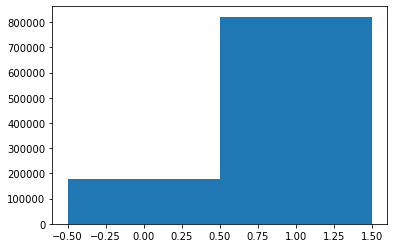

In [12]:
plt.hist(chain[:, -1, 0], bins=2)
plt.show()

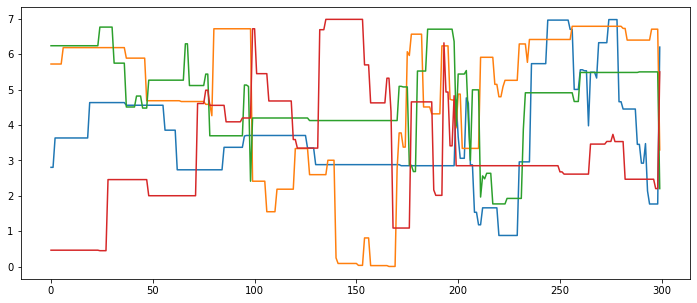

In [26]:
plt.figure(figsize=(12, 5))
plt.plot(chain[900:1200, 0, :])

In [33]:
from enterprise_extensions import hypermodel

In [34]:
super_model = hypermodel.HyperModel(pta)

ndim = len(super_model.param_names)
groups = super_model.get_parameter_groups()
x0 = super_model.initial_sample()

/Users/aaron/mambaforge/envs/rosettaprise/lib/python3.9/site-packages/numpy/lib/arraysetops.py:270: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


In [35]:
sampler = super_model.setup_sampler(outdir='pt_hm')

Adding red noise prior draws...

Adding GWB uniform distribution draws...

Adding gw param prior draws...

Adding nmodel uniform distribution draws...



In [36]:
sampler.sample(x0, int(1e6), AMweight=25, SCAMweight=40, DEweight=55)

Finished 1.00 percent in 2.919447 s Acceptance rate = 0.461344Adding DE jump with weight 55
Finished 99.90 percent in 270.508802 s Acceptance rate = 0.443578
Run Complete


In [22]:
with open('./pt_hm/chain_1.txt', 'r') as f:
    ptmcmc_chain = np.loadtxt(f)

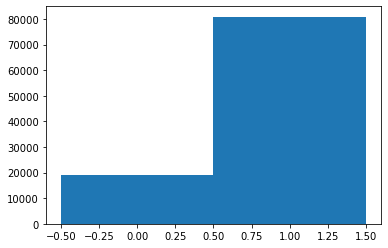

In [38]:
plt.hist(ptmcmc_chain[:, -5], bins=2)
plt.show()

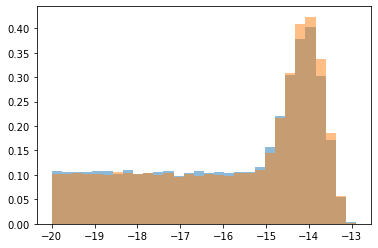

In [24]:
__, bins, __ = plt.hist(chain[::10, 1, 0], bins=30, density=True, alpha=0.5)
plt.hist(ptmcmc_chain[:, 1], bins=bins, density=True, alpha=0.5)
plt.show()

In [46]:
for ii in range(3):
    print('impulse:', integrated_time(chain[::10, ii, 0]))
    print('ptmcmc:', integrated_time(ptmcmc_chain[:, ii]))
    print()

impulse: [3.7936221]
ptmcmc: [4.58503357]

impulse: [8.72050303]
ptmcmc: [14.94220005]

impulse: [9.26625397]
ptmcmc: [16.61645353]



In [15]:
# with multiple cores...
for ii in range(3):
    print('impulse:', integrated_time(chain[::10, ii, 0]))
    print('ptmcmc:', integrated_time(ptmcmc_chain[:, ii]))
    print()

impulse: [7.13741934]
ptmcmc: [4.58503357]

impulse: [13.57621046]
ptmcmc: [14.94220005]

impulse: [15.94378284]
ptmcmc: [16.61645353]



In [23]:
# with multiple cores...
for ii in range(3):
    print('impulse:', integrated_time(chain[::10, ii, 0]))
    print('ptmcmc:', integrated_time(ptmcmc_chain[:, ii]))
    print()

impulse: [7.49640808]
ptmcmc: [4.58503357]

impulse: [13.58194844]
ptmcmc: [14.94220005]

impulse: [16.37232609]
ptmcmc: [16.61645353]



In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
with open('./hm_test/chain_1.txt', 'r') as f:
    chain1 = np.loadtxt(f)

In [28]:
with open('./hm_test_no_ray/chain_1.txt', 'r') as f:
    chain2 = np.loadtxt(f)

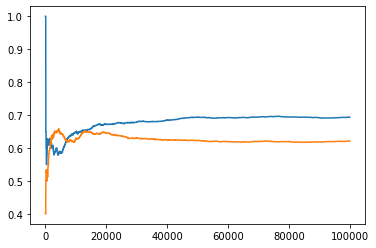

In [39]:
plt.plot(chain1[:, -1])
plt.plot(chain2[:, -1])

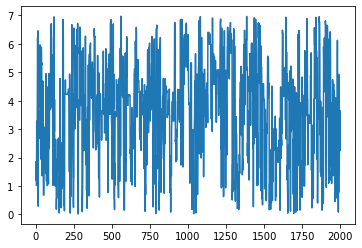

In [25]:
plt.plot(chain1[20000:22000, 0])
# plt.plot(chain2[1000:1200, 0])

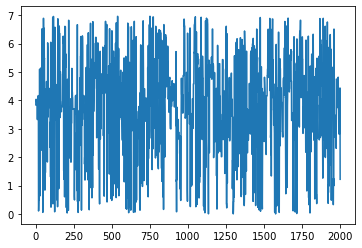

In [24]:
plt.plot(chain2[20000:22000, 0])